In [1]:
import yfinance as yf
import numpy as np
#build function to get sector
def get_sector(stock):
    ticker = yf.Ticker(stock)
    tickerInfo = ticker.info
    df = tickerInfo
    return df['sector']

def tickerStore(empty_list,positions):
    for Pos in range(0,positions):
        store_ticker = str(input("Enter ticker here: "))
        store_ticker = store_ticker.upper()
        empty_list.append(store_ticker)
        
numPos = int(input("How many different stocks do you have?: "))
sector_list = []
ticker_list = []
tickerStore(ticker_list,numPos)
singular_list = []
num_sector_list = []
proportion_dict = {}

for Pos in range(0,numPos):
    sector_list.append(get_sector(ticker_list[Pos]))

#turns list of all sectors into a list with one of each, no duplicates
for Pos in range(0,numPos):
    if sector_list[Pos] not in singular_list:
        singular_list.append(sector_list[Pos])
#use np.zeros and for loops to count each singular sector in the list of all, to make the math work.
percent_counter = np.zeros(len(singular_list))

#another np.zeros to store values of the same sector
store_same_sector = np.zeros(len(singular_list))

for Pos in range(0,numPos):
    for sector in range(0,len(singular_list)):
        if singular_list[sector] == sector_list[Pos]:
            percent_counter[sector] += 1
for sector in range(0,len(singular_list)):
    percent_counter[sector] /= numPos
    
#used the dictionary to multiply back
for sector in range(0,len(singular_list)):
    proportion_dict[singular_list[sector]] = percent_counter[sector]
    
for sector in range(0,len(sector_list)):
    num_sector_list.append(proportion_dict[sector_list[sector]])

How many different stocks do you have?: 4
Enter ticker here: v
Enter ticker here: msft
Enter ticker here: ba
Enter ticker here: aapl


In [2]:
from datetime import date
today = date.today()
#date = today.strftime("%Y-%m-%d")
date = '2021-01-15'
data_list = []
listProportion = []
empty_list1 = []
empty_list2 = []
empty_list3 = []
amount = 0
def get_data(stock):
    ticker = yf.Ticker(stock)
    tickerPrice = ticker.history(period = '1d', start = date)
    df = tickerPrice
    return df['Close']

for Pos in range(0,numPos):
    new_data = get_data(ticker_list[Pos])
    add_data = new_data.to_list()
    data_list.append(add_data)

for stock in range(0,len(data_list)):
    listProportion.append(data_list[stock][0] * num_sector_list[stock])
print(listProportion)

for stock in range(0,len(data_list)):
    empty_list1.append(float(input('How many shares of %s do you have?: '%ticker_list[stock])))
    empty_list2.append(empty_list1[stock]*listProportion[stock])
    amount += empty_list2[stock]

for stock in range(0,len(data_list)):
    empty_list3.append(100 * empty_list2[stock]/amount)


[50.3975, 106.325, 51.08, 63.57]
How many shares of V do you have?: 50
How many shares of MSFT do you have?: 28
How many shares of BA do you have?: 59
How many shares of AAPL do you have?: 67


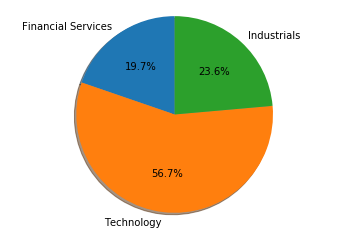

In [3]:
import matplotlib.pyplot as plt
#plot

for sector in range(0,len(singular_list)):
    for sec in range(0,len(sector_list)):
        if sector_list[sec] == singular_list[sector]:
            store_same_sector[sector] += empty_list3[sec]
     
       
labels = singular_list
sizes = store_same_sector
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()